In [33]:
#import initial libraries and functions needed
import pandas as pd
import numpy as np

In [34]:
cancer_data = pd.read_csv("https://raw.githubusercontent.com/joestubbs/coe379L-sp24/master/datasets/unit02/project2.data")

In [35]:
#Shape and size
print(f'Shape: {cancer_data.shape}, Size: {cancer_data.size}')

Shape: (286, 10), Size: 2860


In [36]:
#Datatype info
cancer_data.dtypes

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [37]:
#Check for NAN values other than the ?'s
cancer_data.isnull().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [38]:
#Get unique Values
unique_vals = cancer_data.nunique()
print(unique_vals)

class           2
age             6
menopause       3
tumor-size     11
inv-nodes       7
node-caps       3
deg-malig       3
breast          2
breast-quad     6
irradiat        2
dtype: int64


In [39]:
#Loop to get unique value data from columns
for column in cancer_data.columns:
    if unique_vals[column]:
        print(cancer_data[column].value_counts())

#also shows the ?'s that need to be dealt with

class
no-recurrence-events    201
recurrence-events        85
Name: count, dtype: int64
age
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: count, dtype: int64
menopause
premeno    150
ge40       129
lt40         7
Name: count, dtype: int64
tumor-size
30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: count, dtype: int64
inv-nodes
0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: count, dtype: int64
node-caps
no     222
yes     56
?        8
Name: count, dtype: int64
deg-malig
2    130
3     85
1     71
Name: count, dtype: int64
breast
left     152
right    134
Name: count, dtype: int64
breast-quad
left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: count, dtype: int64
irradiat
no     218
yes     68
Name: count, dtype: int64


In [40]:
#I suppose we could convert a few columns
cancer_data['class'] = cancer_data['class'].astype('category')
cancer_data['deg-malig'] = cancer_data['deg-malig'].astype('category')
#Convert these to type category
categorical_columns = ['menopause', 'node-caps', 'breast', 'breast-quad', 'irradiat']
for column in categorical_columns:
    cancer_data[column] = cancer_data[column].astype('category')

In [41]:
#We could convert tumor-size to categorical as well but there are 7 different categories so nah
cancer_data.dtypes

class          category
age              object
menopause      category
tumor-size       object
inv-nodes        object
node-caps      category
deg-malig      category
breast         category
breast-quad    category
irradiat       category
dtype: object

In [42]:
#Deal with ?'s in node-caps before one hot encoding
indn = cancer_data[cancer_data['node-caps'] == '?'].index
cancer_data[cancer_data['node-caps'] == '?']

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
145,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
233,recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
263,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_up,no
264,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_low,no


In [43]:
#Deal with ?'s in breast-quad before one hot encoding
indb = cancer_data[cancer_data['breast-quad'] == '?'].index
cancer_data[cancer_data['breast-quad'] == '?']

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no


In [44]:
#It would be best to train a model (like knn) based on age, tumor-size, and menopause to do some advanced imputation
#For times sake I will use the modes for rows that are similar
cancer_data['node-caps'] = cancer_data['node-caps'].replace('?', cancer_data['node-caps'].mode()[0])
cancer_data['breast-quad'] = cancer_data['breast-quad'].replace('?', cancer_data['breast-quad'].mode()[0])

/tmp/ipykernel_341/1772983436.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cancer_data['node-caps'] = cancer_data['node-caps'].replace('?', cancer_data['node-caps'].mode()[0])
/tmp/ipykernel_341/1772983436.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cancer_data['breast-quad'] = cancer_data['breast-quad'].replace('?', cancer_data['breast-quad'].mode()[0])


In [45]:
#Heres what the node-caps were replaced with
for i in indn:
    print(cancer_data[cancer_data.index == i]['node-caps'])

145    no
Name: node-caps, dtype: category
Categories (2, object): ['no', 'yes']
163    no
Name: node-caps, dtype: category
Categories (2, object): ['no', 'yes']
164    no
Name: node-caps, dtype: category
Categories (2, object): ['no', 'yes']
183    no
Name: node-caps, dtype: category
Categories (2, object): ['no', 'yes']
184    no
Name: node-caps, dtype: category
Categories (2, object): ['no', 'yes']
233    no
Name: node-caps, dtype: category
Categories (2, object): ['no', 'yes']
263    no
Name: node-caps, dtype: category
Categories (2, object): ['no', 'yes']
264    no
Name: node-caps, dtype: category
Categories (2, object): ['no', 'yes']


In [46]:
#Heres what the breast-quad was replaced with
for i in indb:
    print(cancer_data[cancer_data.index == i]['breast-quad'])

206    left_low
Name: breast-quad, dtype: category
Categories (5, object): ['central', 'left_low', 'left_up', 'right_low', 'right_up']


/tmp/ipykernel_341/3664037182.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


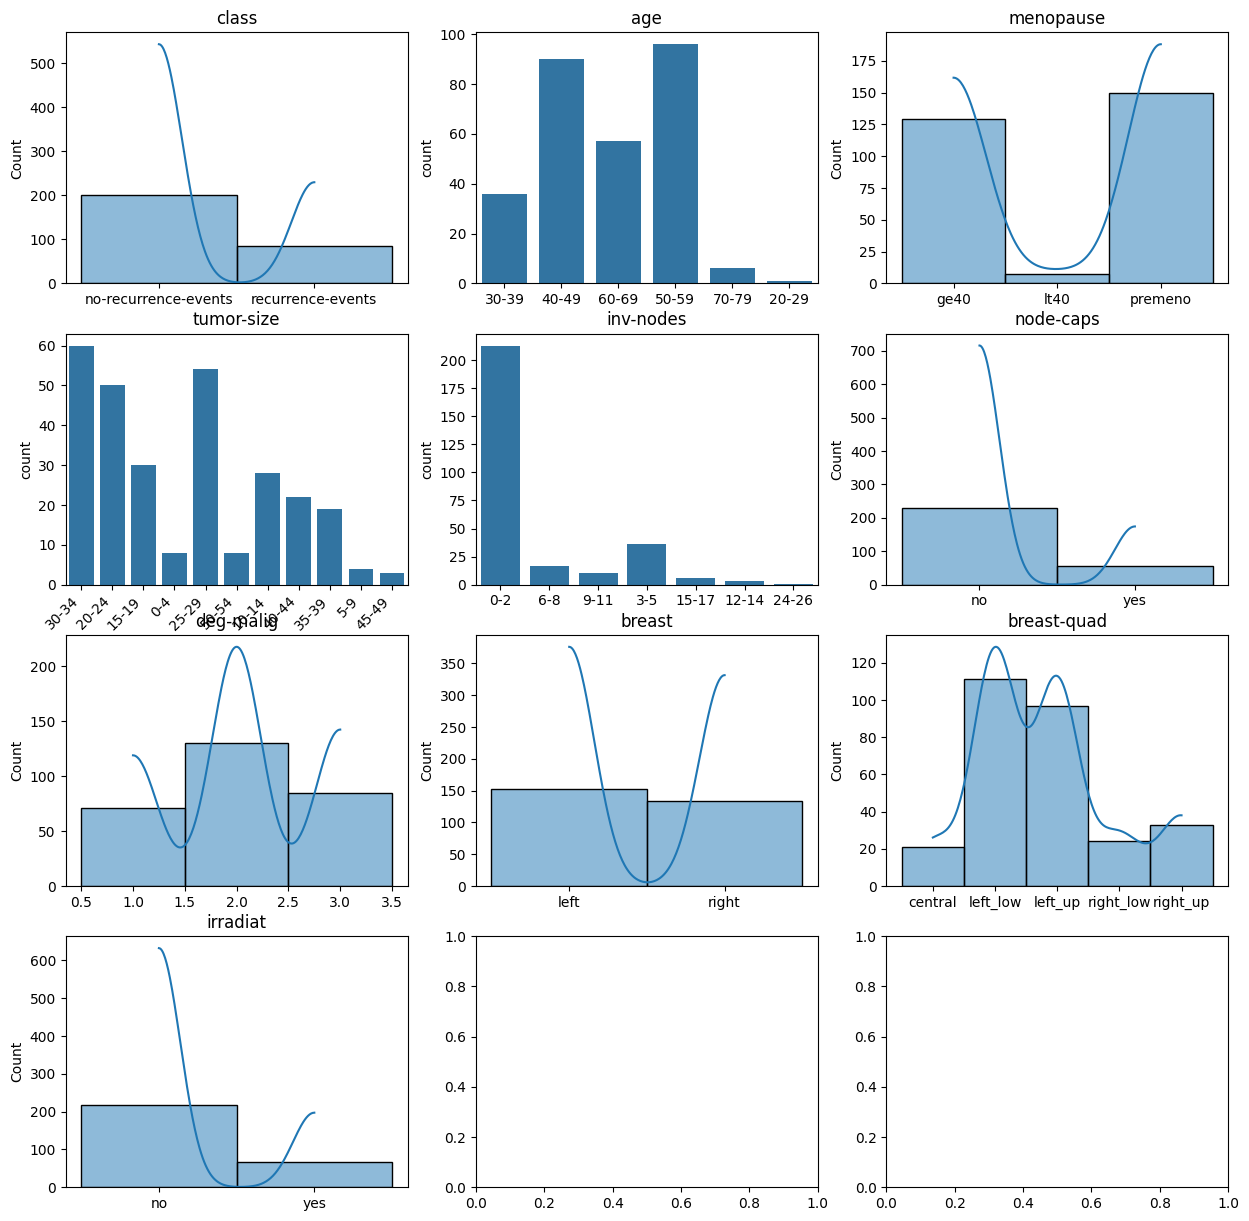

In [47]:
#Visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

#Univariate analysis for each column
for i, column in enumerate(cancer_data.columns):
    ax = axes.flatten()[i]
    if cancer_data[column].dtype == 'object':
        sns.countplot(x=column, data=cancer_data, ax=ax)
        if column == 'tumor-size':
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    else:
        sns.histplot(cancer_data[column], ax=ax, kde=True)
    ax.set_title(column)
    ax.set_xlabel('')

plt.show()

In [48]:
'''
Class: Imbalanced distribution
Age: Most Cases are within 40-59 year old range
Menopause: Most cases in patients promenopause and menopause cases over age 40
tumor-size: Biggest tumor diameter lie within 30-34, 25-29, and 20-24 
node-caps: Imbalanced distribution
deg-malig: balanced distribution
breast: Fairly balanced distribution
breast-quad: Fairly balanced distribution
irradiat: Imbalanced distribution
'''

'\nClass: Imbalanced distribution\nAge: Most Cases are within 40-59 year old range\nMenopause: Most cases in patients promenopause and menopause cases over age 40\ntumor-size: Biggest tumor diameter lie within 30-34, 25-29, and 20-24 \nnode-caps: Imbalanced distribution\ndeg-malig: balanced distribution\nbreast: Fairly balanced distribution\nbreast-quad: Fairly balanced distribution\nirradiat: Imbalanced distribution\n'

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#Dropping not so important columns and wanting to predict the class
X = cancer_data.drop(['class','breast', 'breast-quad'], axis=1)  # Features
y = cancer_data['class']  # Labels

#Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Concatenate training and testing data for consistency in categorical columns
combined_data = pd.concat([X_train, X_test], axis=0)

#Define our categorical columns to be one-hot encoded
cat_cols = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'irradiat']
#Get numeric columns
num_cols = [col for col in combined_data.columns if col not in cat_cols]

#One hot encoding all the categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])
X_preprocessed = preprocessor.fit_transform(combined_data)

#Split data back into training and testing sets
X_train_preprocessed = X_preprocessed[:len(X_train)]
X_test_preprocessed = X_preprocessed[len(X_train):]


In [50]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
k = 5
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(X_train_preprocessed, y_train)

KNeighborsClassifier()

In [51]:
#Checking Accuracy on KNN using classification report
from sklearn.metrics import classification_report

# Evaluate model performance
metrics_KNN = classification_report(y_test, KNN_model.predict(X_test_preprocessed))
print(f"Performance on TEST\n*******************\n{metrics_KNN}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, KNN_model.predict(X_train_preprocessed))}")

Performance on TEST
*******************
                      precision    recall  f1-score   support

no-recurrence-events       0.66      0.89      0.76        37
   recurrence-events       0.50      0.19      0.28        21

            accuracy                           0.64        58
           macro avg       0.58      0.54      0.52        58
        weighted avg       0.60      0.64      0.58        58

Performance on TRAIN
********************
                      precision    recall  f1-score   support

no-recurrence-events       0.83      0.95      0.89       164
   recurrence-events       0.80      0.50      0.62        64

            accuracy                           0.82       228
           macro avg       0.81      0.73      0.75       228
        weighted avg       0.82      0.82      0.81       228



In [52]:
#Logistic Regression Model 
from sklearn.linear_model import LogisticRegression

# fit the LG model -- random_state is used to shuffle the data; max_iter is max # of iterations for solver to converge (default is 100)
LG_model = LogisticRegression(random_state=1, max_iter=1000).fit(X_train_preprocessed, y_train)


In [53]:
# Evaluate model performance
metrics_LG = classification_report(y_test, LG_model.predict(X_test_preprocessed))
print(f"Performance on TEST\n*******************\n{metrics_LG}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, LG_model.predict(X_train_preprocessed))}")


Performance on TEST
*******************
                      precision    recall  f1-score   support

no-recurrence-events       0.69      0.95      0.80        37
   recurrence-events       0.71      0.24      0.36        21

            accuracy                           0.69        58
           macro avg       0.70      0.59      0.58        58
        weighted avg       0.70      0.69      0.64        58

Performance on TRAIN
********************
                      precision    recall  f1-score   support

no-recurrence-events       0.80      0.94      0.87       164
   recurrence-events       0.72      0.41      0.52        64

            accuracy                           0.79       228
           macro avg       0.76      0.67      0.69       228
        weighted avg       0.78      0.79      0.77       228



In [54]:
#Decision Tree based on tumor-size and menopause
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(random_state=1).fit(X_train_preprocessed, y_train)


In [55]:
# Evaluate model performance
metrics_DT = classification_report(y_test, DT_model.predict(X_test_preprocessed))
print(f"Performance on TEST\n*******************\n{metrics_DT}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, DT_model.predict(X_train_preprocessed))}")

Performance on TEST
*******************
                      precision    recall  f1-score   support

no-recurrence-events       0.70      0.95      0.80        37
   recurrence-events       0.75      0.29      0.41        21

            accuracy                           0.71        58
           macro avg       0.72      0.62      0.61        58
        weighted avg       0.72      0.71      0.66        58

Performance on TRAIN
********************
                      precision    recall  f1-score   support

no-recurrence-events       0.91      1.00      0.95       164
   recurrence-events       1.00      0.75      0.86        64

            accuracy                           0.93       228
           macro avg       0.96      0.88      0.91       228
        weighted avg       0.94      0.93      0.93       228



In [56]:
#Metrics of all models
print('KNN Metrics:\n', metrics_KNN)
print('\n')
print('Logistic Regression Metrics:\n', metrics_LG)
print('\n')
print('Decision Tree Metrics:\n', metrics_DT)

'''F1-score is most important here as the data set features imbalanced features(columns) thus accuracy can be misleading.'''

KNN Metrics:
                       precision    recall  f1-score   support

no-recurrence-events       0.66      0.89      0.76        37
   recurrence-events       0.50      0.19      0.28        21

            accuracy                           0.64        58
           macro avg       0.58      0.54      0.52        58
        weighted avg       0.60      0.64      0.58        58



Logistic Regression Metrics:
                       precision    recall  f1-score   support

no-recurrence-events       0.69      0.95      0.80        37
   recurrence-events       0.71      0.24      0.36        21

            accuracy                           0.69        58
           macro avg       0.70      0.59      0.58        58
        weighted avg       0.70      0.69      0.64        58



Decision Tree Metrics:
                       precision    recall  f1-score   support

no-recurrence-events       0.70      0.95      0.80        37
   recurrence-events       0.75      0.29      0.41  

'F1-score is most important here as the data set features imbalanced features(columns) thus accuracy can be misleading.'

In [57]:
#Bonus: Using Grid Search to find best knn model and improve in f1-score metric
from sklearn.model_selection import GridSearchCV

knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}

knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)
knn_gscv.fit(X_train_preprocessed, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [58]:
knn_gscv.best_params_

{'n_neighbors': 11}

In [59]:
#This lets us know that K=11 is the best classifier
k = 11
KNN_model_best = KNeighborsClassifier(n_neighbors=k)
KNN_model_best.fit(X_train_preprocessed, y_train)
metrics_KNN_best = classification_report(y_test, KNN_model_best.predict(X_test_preprocessed))
print(f"Performance on TEST\n*******************\n{metrics_KNN_best}")

Performance on TEST
*******************
                      precision    recall  f1-score   support

no-recurrence-events       0.67      0.95      0.79        37
   recurrence-events       0.67      0.19      0.30        21

            accuracy                           0.67        58
           macro avg       0.67      0.57      0.54        58
        weighted avg       0.67      0.67      0.61        58



In [61]:
'''As we can see the f1-scores for recurrence were improved based on greater precision'''

'As we can see the recall score and f1-scores for recurrence were improved'